In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk import tokenize
from sklearn.preprocessing  import LabelEncoder



In [2]:
df=pd.read_csv('/content/phishing_site_urls.csv')

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df['URL'][0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [5]:
df['Label'].value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

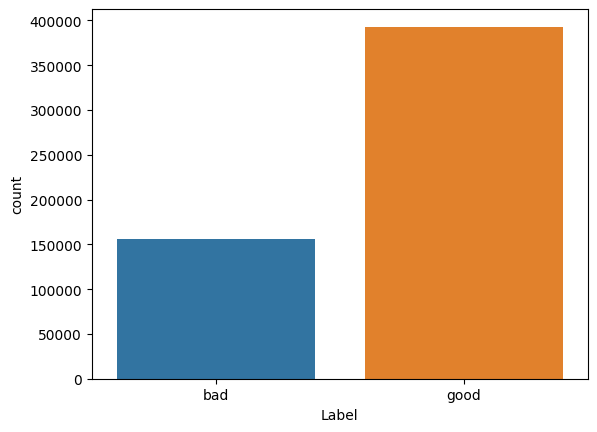

In [6]:
sns.countplot(x='Label',data=df)
plt.show()

In [7]:
df.isna().sum()

URL      0
Label    0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
tokenizer = tokenize.RegexpTokenizer(r'[A-Za-z]+')

In [10]:
def Tokenization(text):
  temp=[]
  text=tokenizer.tokenize(text)
  return text


In [11]:
df['tokenized_text']=df['URL'].apply(Tokenization)

In [12]:
df['tokenized_text'][0]

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def Stemming(text):
  temp=[]
  for word in text:
    temp.append(ps.stem(word))
  return ' '.join(temp)


In [14]:
df['Stemmed_Text']=df['tokenized_text'].apply(Stemming)

In [15]:
df.head()

,URL,Label,tokenized_text,Stemmed_Text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...",thewhiskeydreg com wp content theme widescreen...


In [16]:
wc=WordCloud(max_words=1000,colormap='viridis')

In [17]:
image=wc.generate(df[df['Label']=='bad']['Stemmed_Text'].str.cat(sep=' '))

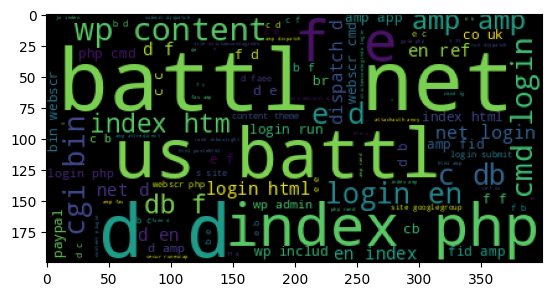

In [18]:
plt.imshow(image)

In [19]:
image=wc.generate(df[df['Label']=='good']['Stemmed_Text'].str.cat(sep=' '))

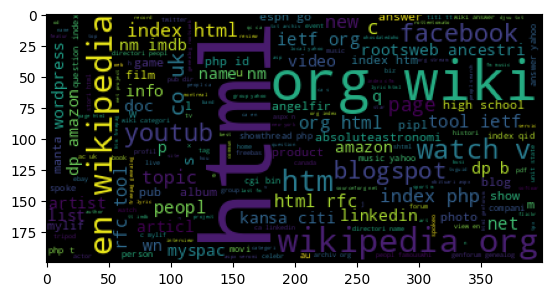

In [20]:
plt.imshow(image)

In [21]:
df.drop('tokenized_text',axis=1,inplace=True)

In [22]:
df.head()

,URL,Label,Stemmed_Text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydreg com wp content theme widescreen...


In [23]:
fd=df[['Stemmed_Text','Label']]
fd


,Stemmed_Text,Label
0,nobel it ffb d dca cce f login skype com en cg...,bad
1,www dghjdgf com paypal co uk cycgi bin webscrc...,bad
2,serviciosbi com paypal cgi bin get into herf s...,bad
3,mail printakid com www onlin americanexpress c...,bad
4,thewhiskeydreg com wp content theme widescreen...,bad
...,...,...
516466,,bad
516467,appl checker org,bad
516468,appl iclod org,bad
516469,appl uptoday org,bad


In [24]:
import tensorflow as tf
max_len=1000

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(fd['Stemmed_Text'])
sequences = tokenizer.texts_to_sequences(fd['Stemmed_Text'])

In [27]:
sequences[0]

[5682,
 107,
 4266,
 3,
 3642,
 4058,
 10,
 17,
 8965,
 1,
 14,
 44,
 60,
 467,
 17,
 4266,
 3,
 3642,
 4058,
 10,
 15,
 7,
 50,
 158,
 12143,
 21511,
 35,
 1885,
 39,
 1612,
 4572,
 74,
 845,
 497,
 17,
 758]

In [28]:
x=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=max_len)

In [29]:
y=fd['Label']
y

0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
516466    bad
516467    bad
516468    bad
516469    bad
516470    bad
Name: Label, Length: 507196, dtype: object

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=classifier.predict(x_test)

In [33]:
y_pred

array(['good', 'good', 'good', ..., 'good', 'good', 'bad'], dtype=object)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.801833596214511

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [36]:
y_pred=classifier.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.9566837539432177

In [38]:
data=pd.DataFrame({'predict':y_pred,'Real':y_test})

In [39]:
data

,predict,Real
364326,good,good
306315,good,good
324433,good,good
428439,good,good
97061,good,bad
...,...,...
39934,bad,bad
82036,good,good
451461,good,good
153964,good,good


In [43]:
tokenizer = tokenize.RegexpTokenizer(r'[A-Za-z]+')

In [44]:
from nltk import tokenize
tokenizer = tokenize.RegexpTokenizer(r'[A-Za-z]+')
url=input()
url=tokenizer.tokenize(url)
url=Stemming(url)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(url)
sequences = tokenizer.texts_to_sequences(url)
url=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=max_len)
a=classifier.predict(url)



amazon.com


In [45]:
a

array(['good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'good'], dtype=object)

In [46]:
df.head()

,URL,Label,Stemmed_Text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydreg com wp content theme widescreen...


In [47]:
df

,URL,Label,Stemmed_Text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydreg com wp content theme widescreen...
...,...,...,...
516466,23.227.196.215/,bad,
516467,apple-checker.org/,bad,appl checker org
516468,apple-iclods.org/,bad,appl iclod org
516469,apple-uptoday.org/,bad,appl uptoday org


In [48]:
df['Label'].value_counts()

good    392897
bad     114299
Name: Label, dtype: int64

In [49]:
df=df[:100000]

In [50]:
df['Label'].value_counts()

bad     51897
good    48103
Name: Label, dtype: int64

In [51]:
df['URL'][0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [52]:
import requests
from bs4 import BeautifulSoup

In [ ]:
def fetch_and_preprocess_html(url):
    try:
        response = requests.get((r'http://'+url))
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            text = soup.get_text()
            return text
    except Exception as e:
        print(f"Error fetching webpage: {e}")
    return None

In [53]:
List_Bad=df[df['Label']=='bad']['URL'][:100]
List_Good=df[df['Label']=='good']['URL'][:100]

In [54]:
#List_Text_Good=[fetch_and_preprocess_html(i) for i in List_Bad]
#List_Text_Bad=[fetch_and_preprocess_html(i) for i in List_Good]

NameError: ignored

In [55]:
#List_Text_Good[0]

NameError: ignored

In [56]:
df.shape

(100000, 3)

In [57]:
df.head()

,URL,Label,Stemmed_Text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydreg com wp content theme widescreen...


In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [60]:
df=pd.read_csv('/content/Phishing_site.csv')

In [61]:
df=df[:100000]

In [62]:
df.columns

Index(['Unnamed: 0', 'URL', 'label'], dtype='object')

In [63]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [64]:
df.head()

,URL,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0
3,mail.printakid.com/www.online.americanexpress....,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,0


In [65]:
X = df['URL'].astype(str)
y = df['label']

In [66]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=100)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [68]:
y_train

75220    1
48955    1
44966    0
13568    0
92727    1
        ..
6265     0
54886    1
76820    1
860      0
15795    0
Name: label, Length: 80000, dtype: int64

In [69]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [71]:
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
2000/2000 [==============================] - 445s 218ms/step - loss: 0.1227 - accuracy: 0.9505 - val_loss: 0.0725 - val_accuracy: 0.9737
Epoch 2/3
2000/2000 [==============================] - 440s 220ms/step - loss: 0.0594 - accuracy: 0.9767 - val_loss: 0.0665 - val_accuracy: 0.9754
Epoch 3/3
2000/2000 [==============================] - 451s 225ms/step - loss: 0.0457 - accuracy: 0.9824 - val_loss: 0.0685 - val_accuracy: 0.9760


In [72]:
loss, accuracy = model.evaluate(X_test, y_test)

625/625 [==============================] - 36s 58ms/step - loss: 0.0692 - accuracy: 0.9752


In [73]:
accuracy

0.9751999974250793

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

new_url = ['https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbTlvQ3V0S1lYY0x6dExSdGZ5MndnbV8xb1JjUXxBQ3Jtc0tuMUdxQWk2clVCZjhicmQ2YWE0OERxU28yZ19CMm4tdWxBTXRWM011V1B4dnpKUE5aN1lrRzExWHo4ZEtHTkdHM1NQdXBTd1JXQ2p6V2JuaTZaYmg1bmhzVjZCM0pjUnhXNVVZcVl1Z1NNWXE2Mjg2WQ&q=https%3A%2F%2Fbit.ly%2F32Ts14s&v=zKNXHluHneU&html_redirect=1']
new_url_seq = tokenizer.texts_to_sequences(new_url)  # Tokenize the new URL
new_url_padded = pad_sequences(new_url_seq, maxlen=100)  # Pad the sequence


In [75]:
predictions = model.predict(new_url_padded)


1/1 [==============================] - 2s 2s/step


In [76]:
if predictions[0] >= 0.5:
    print("Phishing URL (Probability:", predictions[0], ")")
else:
    print("Legitimate URL (Probability:", predictions[0], ")")

Legitimate URL (Probability: [3.3423938e-05] )


In [77]:
import pickle

In [79]:
pickle.dump(model,open('Phishing.pkl','wb'))

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, 'Phishing.h5')


In [ ]:
model_new=tf.keras.models.Sequential()

In [ ]:
model_new.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=100))

In [ ]:
model_new.add(tf.keras.layers.LSTM(units=64))

In [ ]:
model_new.add(tf.keras.layers.Dense(units=16,activation='relu'))

In [ ]:
model_new.add(tf.keras.layers.Dropout(0.2))

In [ ]:
model_new.add(tf.keras.layers.Dense(units=2,activation='relu'))

In [ ]:
model_new.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
earlystopping=tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss')

In [ ]:
model_new.fit(X_train,y_train,epochs=10,callbacks=[earlystopping])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

new_url = ['https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbTlvQ3V0S1lYY0x6dExSdGZ5MndnbV8xb1JjUXxBQ3Jtc0tuMUdxQWk2clVCZjhicmQ2YWE0OERxU28yZ19CMm4tdWxBTXRWM011V1B4dnpKUE5aN1lrRzExWHo4ZEtHTkdHM1NQdXBTd1JXQ2p6V2JuaTZaYmg1bmhzVjZCM0pjUnhXNVVZcVl1Z1NNWXE2Mjg2WQ&q=https%3A%2F%2Fbit.ly%2F32Ts14s&v=zKNXHluHneU&html_redirect=1']
new_url_seq = tokenizer.texts_to_sequences(new_url)  # Tokenize the new URL
new_url_padded = pad_sequences(new_url_seq, maxlen=100)  # Pad the sequence


In [ ]:
predictions = model_new.predict(new_url_padded)

In [ ]:
predictions

In [ ]:
if predictions[0] >= 0.5:
    print("Phishing URL (Probability:", predictions[0], ")")
else:
    print("Legitimate URL (Probability:", predictions[0], ")")